In [1]:
import matplotlib.pyplot as pyplot
from cmath import pi, exp, phase

In [2]:
def z(w):
    return exp(w*1j)

def analyze_transfer_function(transfer_function, steps=100):
    frequencies = [pi * i / steps for i in range(steps)]
    magnitudes = [abs(transfer_function(w)) for w in frequencies]
    phases = [phase(transfer_function(w)) for w in frequencies]
    return frequencies, magnitudes, phases

In [3]:
def plot_filter(frequencies, magnitudes, phases):
    figure = pyplot.figure(figsize=(20,12))
    
    ticks = [0, pi / 4, pi / 2, 3 * pi / 4, pi, 5 * pi / 4, 3 * pi / 2, 7 * pi / 4]
    tick_labels = ['$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$', r'$5\pi/4$', r'$3\pi/2$', r'$7\pi/4$']
    
    mag_linear = figure.add_subplot(2,2,1)
    mag_linear.plot(frequencies, magnitudes)
    mag_linear.set_yscale('log')
    mag_linear.set_title("Magnitude Response")
    mag_linear.set_xticks(ticks[0:5])
    mag_linear.set_xticklabels(tick_labels[0:5])
    
    phase_linear = figure.add_subplot(2,2,2)
    phase_linear.plot(frequencies, phases)
    phase_linear.set_title("Phase Response")
    phase_linear.set_xticks(ticks[0:5])
    phase_linear.set_xticklabels(tick_labels[0:5])

    mag_polar = figure.add_subplot(2, 2, 3, projection="polar")
    mag_polar.plot(frequencies, magnitudes)
    mag_polar.set_xticks(ticks)
    mag_polar.set_xticklabels(tick_labels)
    
    phase_polar = figure.add_subplot(2, 2, 4, projection="polar")
    phase_polar.plot(frequencies, phases)
    phase_polar.set_xticks(ticks)
    phase_polar.set_xticklabels(tick_labels)

In [4]:
def first_order(w):
    return 0.5 + 0.5 * z(w)**-1

def resonant(w):
    return (1 + 0.73 * z(w)**-1 + z(w)**-2) / (1 - 0.78 * z(w)**-1 + 0.88 * z(w)**-2)

def third(w):
    return (1 + 0.5 * z(w)**-1 + 0.25 * z(w)**-2 + 0.5 * z(w)**-3) / (1 - 0.5 * z(w)**-1 - 0.25 * z(w)**-2)

def hpf(w):
    return (1 - 0.5 * z(w)**-1) / (0.5 + 0.5 * z(w)**-1)

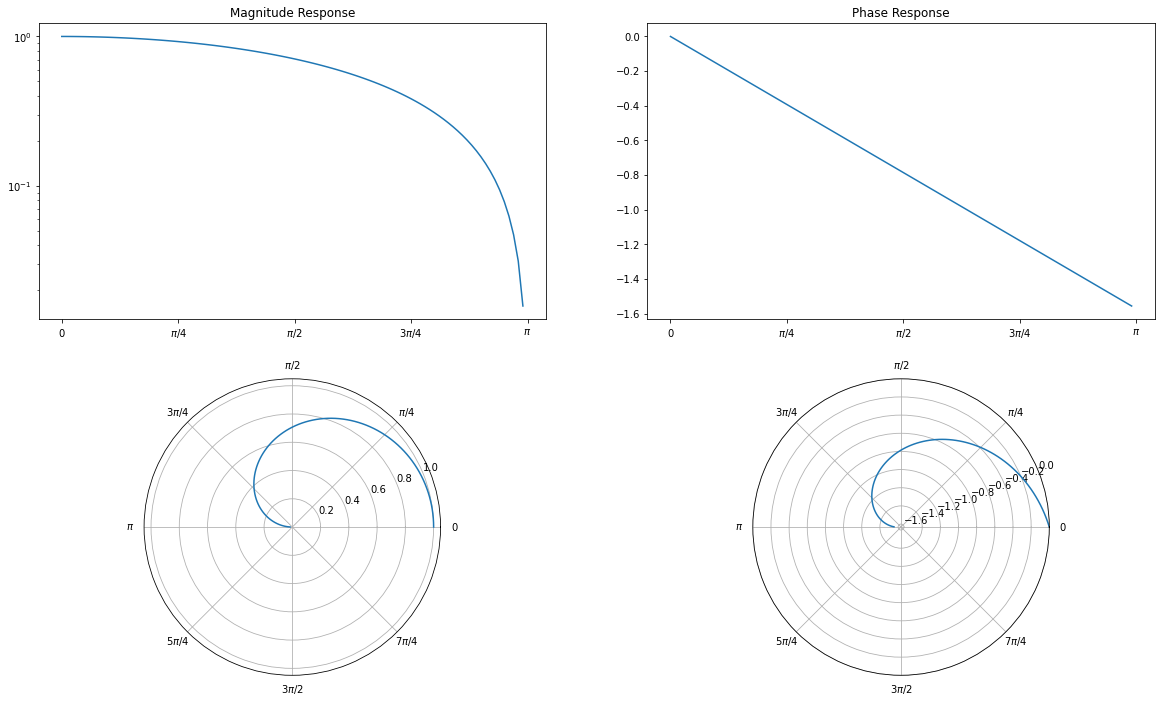

In [5]:
plot_filter(*analyze_transfer_function(first_order))

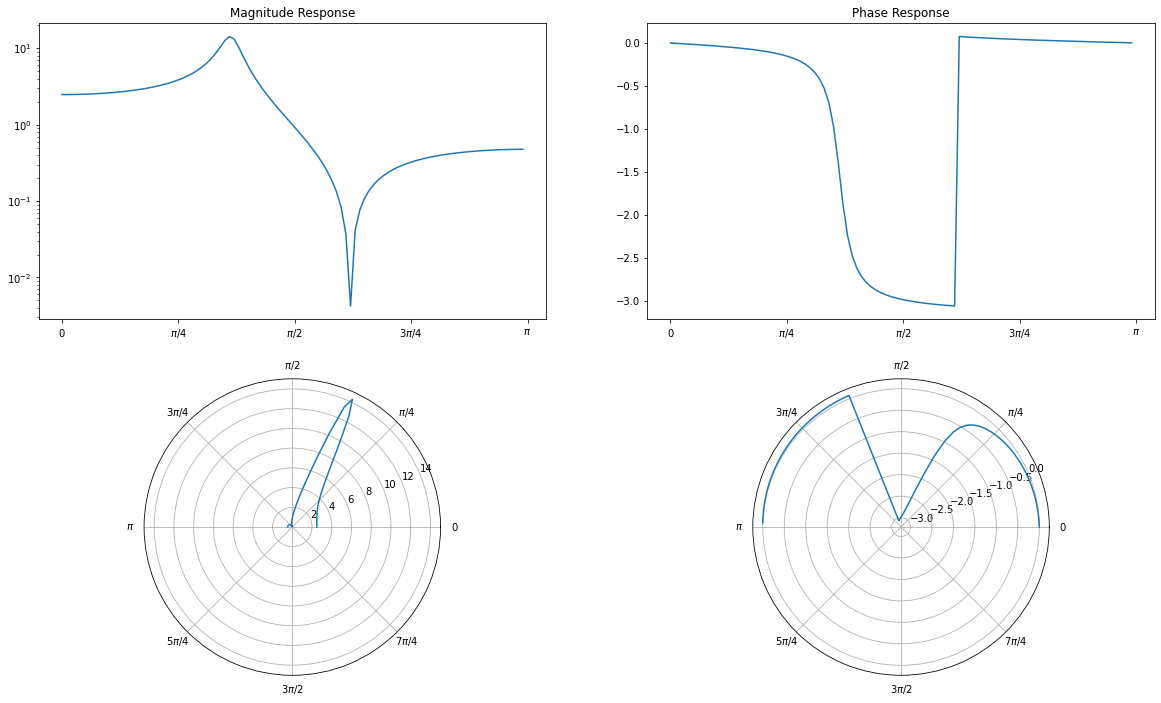

In [6]:
plot_filter(*analyze_transfer_function(resonant))

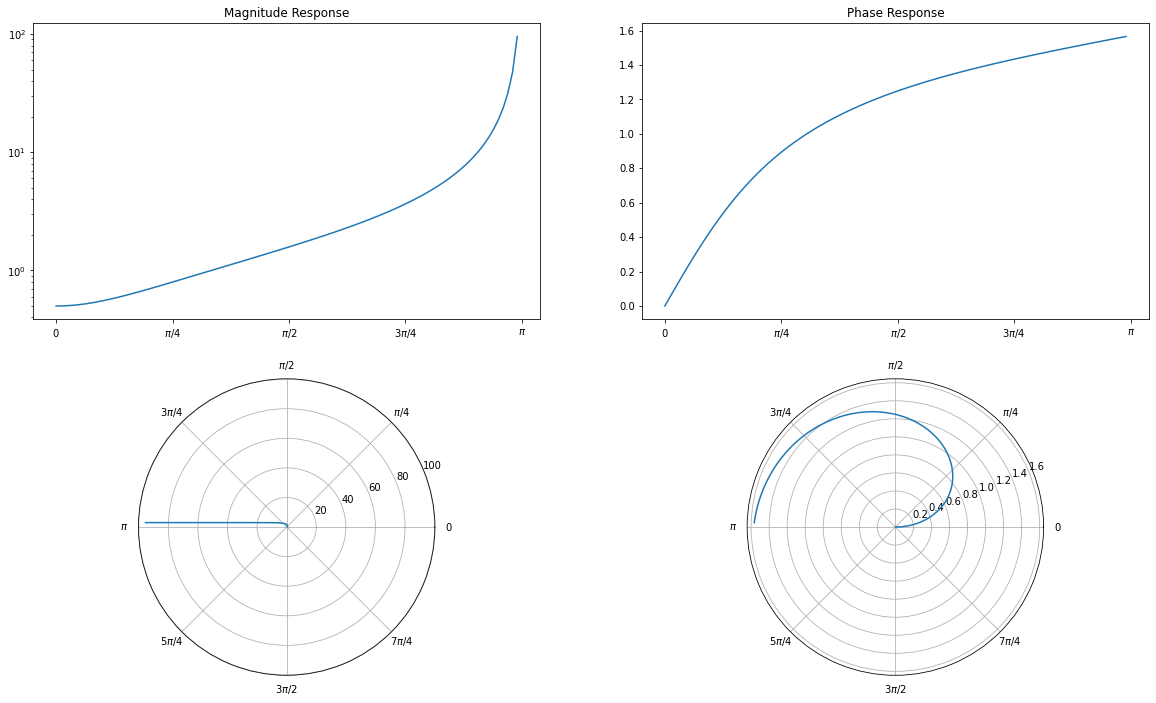

In [7]:
plot_filter(*analyze_transfer_function(hpf))